In [1]:
#Expand notebook to take full screen width
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

###
import sys
sys.path.insert(0,'../../src/')

%load_ext autoreload
%autoreload 2

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import numpy as np
import pickle
import pandas as pd
sns.reset_orig()
matplotlib.rcParams.update({'font.size': 12})
from utils_write import loadfile, stack_weights, cr_calc

In [19]:
const = loadfile(250, 10, 2500, 1250, 1e-6, 5, 16, "LeNet_300_100", model_save_dir = "./files", fn = "_c")
warmup = loadfile(250, 10, 2500, 1250, 1e-6, 5, 16, "LeNet_300_100", model_save_dir = "./files", fn = "_wu")
sawtooth = loadfile(250, 10, 2500, 1250, 1e-6, 5, 16, "LeNet_300_100", model_save_dir = "./files", fn = "_st")

### Tau Plot

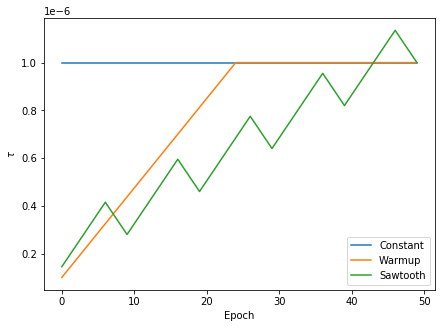

In [39]:
plt.figure(figsize = (7,5))
cl = plt.plot(const['tau_s'], label = "Constant")
wl = plt.plot(warmup['tau_s'], label = "Warmup")
sl = plt.plot(sawtooth['tau_s'], label = "Sawtooth")
ax=plt.gca()
ax.get_yaxis().get_major_formatter().set_powerlimits((0, 1e-10))
plt.ylabel("$\\tau$")
plt.xlabel("Epoch")
plt.legend()

c=cl[0].get_color()
w=wl[0].get_color()
s=sl[0].get_color()

### Loss Plot

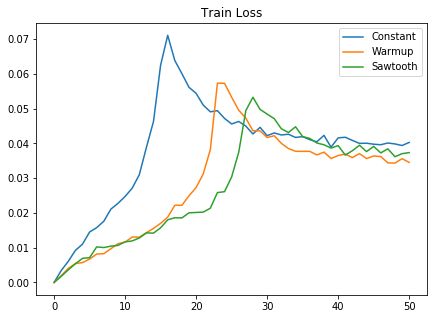

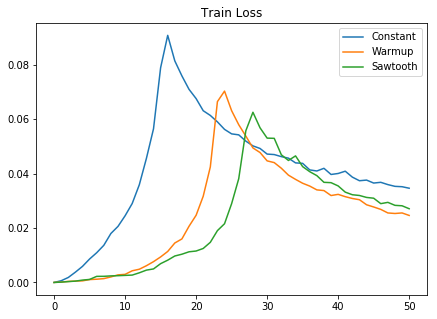

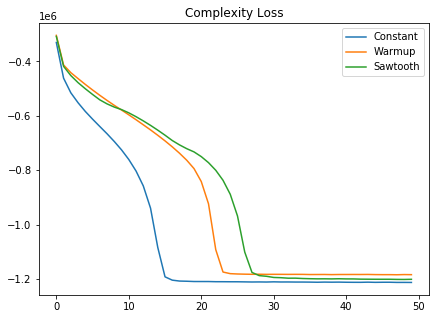

In [60]:
plt.figure(figsize=(7,5))
cl = plt.plot(const['test_loss_mse'], label = "Constant")
wl = plt.plot(warmup['test_loss_mse'], label = "Warmup")
sl = plt.plot(sawtooth['test_loss_mse'], label = "Sawtooth")
plt.title("Train Loss")
plt.legend()

plt.figure(figsize=(7,5))
plt.plot(const['train_loss_mse'], label = "Constant")
plt.plot(warmup['train_loss_mse'], label = "Warmup")
plt.plot(sawtooth['train_loss_mse'], label = "Sawtooth")
plt.title("Train Loss")
plt.legend()

plt.figure(figsize=(7,5))
plt.plot(const['complexity_loss'], label = "Constant")
plt.plot(warmup['complexity_loss'], label = "Warmup")
plt.plot(sawtooth['complexity_loss'], label = "Sawtooth")
ax = plt.gca()
ax.get_yaxis().get_major_formatter().set_powerlimits((0,0))
plt.title("Complexity Loss")
plt.legend()

### Accuracy Plot

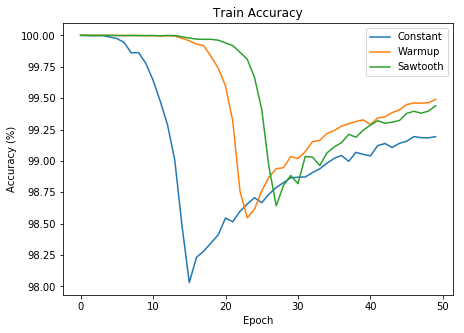

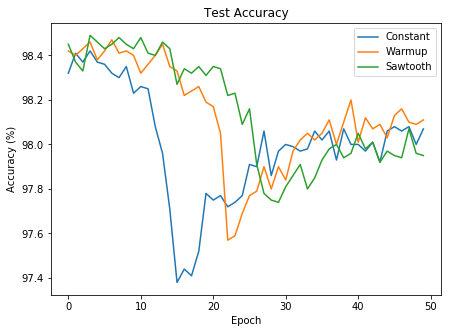

In [51]:
plt.figure(figsize=(7,5))
cl = plt.plot(const['train_acc'], label = "Constant")
wl = plt.plot(warmup['train_acc'], label = "Warmup")
sl = plt.plot(sawtooth['train_acc'], label = "Sawtooth")
plt.ylabel("Accuracy (%)")
plt.xlabel("Epoch")
plt.title("Train Accuracy")
plt.legend()

plt.figure(figsize=(7,5))
plt.plot(const['test_acc'], label = "Constant")
plt.plot(warmup['test_acc'], label = "Warmup")
plt.plot(sawtooth['test_acc'], label = "Sawtooth")
plt.title("Test Accuracy")
plt.ylabel("Accuracy (%)")
plt.xlabel("Epoch")
plt.legend()